# Hello TensorFlow

In [11]:
# 隐藏警告
import warnings
warnings.filterwarnings('ignore')

In [12]:
# 打印多行
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import tensorflow as tf
# 打印tensorflow版本
tf.__version__
# 定义常量操作 hello
hello = tf.constant("Hello TensofFlow")
# 创建一个会话
sess = tf.Session()
# 执行常量操作 hello 并打印到标准输出
sess.run(hello)

'1.13.2'

b'Hello TensofFlow'

# 多层感知机模型示例

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

## MNIST手写数字数据集

MNIST图像数据集使用形如［28，28］的二阶数组来表示每张图像，数组中的每个元素对应一个像素点。该数据集中的图像都是256阶灰度图，像素值0表示白色（背景），255表示黑色（前景）。由于每张图像的尺寸都是28x28像素，为了方便连续存储，我们可以将形如［28，28］的二阶数组“摊平”成形如［784］的一阶数组。数组中的784个元素共同组成了一个784维的向量。

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

更多: http://yann.lecun.com/exdb/mnist/

In [5]:
# 导入 MNIST 数据集
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./tmp/data/", one_hot=True)

import tensorflow as tf

Extracting ./tmp/data/train-images-idx3-ubyte.gz
Extracting ./tmp/data/train-labels-idx1-ubyte.gz
Extracting ./tmp/data/t10k-images-idx3-ubyte.gz
Extracting ./tmp/data/t10k-labels-idx1-ubyte.gz


In [6]:
help(mnist.train)

Help on DataSet in module tensorflow.contrib.learn.python.learn.datasets.mnist object:

class DataSet(builtins.object)
 |  Container class for a dataset (deprecated).
 |  
 |  THIS CLASS IS DEPRECATED. See
 |  [contrib/learn/README.md](https://www.tensorflow.org/code/tensorflow/contrib/learn/README.md)
 |  for general migration instructions.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, images, labels, fake_data=False, one_hot=False, dtype=tf.float32, reshape=True, seed=None)
 |      Construct a DataSet. (deprecated)
 |      
 |      Warning: THIS FUNCTION IS DEPRECATED. It will be removed in a future version.
 |      Instructions for updating:
 |      Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
 |      
 |      one_hot arg is used only if fake_data is true.  `dtype` can be either
 |      `uint8` to leave the input as `[0, 255]`, or `float32` to rescale into
 |      `[0, 1]`.  Seed arg provides for convenient deterministic testing.
 |  
 |

In [7]:
mnist.train.num_examples

55000

In [8]:
mnist.train.images.shape

(55000, 784)

In [9]:
mnist.train.labels.shape

(55000, 10)

In [10]:
# 超参数
# 学习率/训练块大小/训练轮数/训练展示轮数
learning_rate = 0.01  
batch_size = 128
num_steps = 500
display_steps = 100

# 神经网络参数
# 第一层神经元个数/第二层神经元个数/mnist输入数据（28*28）/mnist类别数（0-9）
n_hidden_1 = 128
n_hidden_2 = 128
num_input = 784
num_class = 10

# 输入到数据流图中的训练数据,placeholder是占位符
# [None,num_input] 表示 num_input列,行不定,实际上行是训练块大小 batch_size
X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_class])

In [11]:
# 权重和偏置

# tf.random_normal()函数用于从“服从指定正态分布的序列”中随机取出指定个数的值。
# tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
# shape: 输出张量的形状，必选
# mean: 正态分布的均值，默认为0
# stddev: 正态分布的标准差，默认为1.0
# dtype: 输出的类型，默认为tf.float32
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样
# name: 操作的名称\

weights = {
    'h1':tf.Variable(tf.random_normal([num_input,n_hidden_1],seed=2020)),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2],seed=2020)),
    'out':tf.Variable(tf.random_normal([n_hidden_2,num_class],seed=2020))
}

biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1],seed=2020)),
    'b2':tf.Variable(tf.random_normal([n_hidden_2],seed=2020)),
    'out':tf.Variable(tf.random_normal([num_class],seed=2020))
}

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# 定义神经网络
def neural_net(x):
    # 第一层隐藏层
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # 第二层隐藏层
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # 输出层
    out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    
    return out_layer

In [13]:
# 构建模型
logits = neural_net(X)

# 定义损失函数和优化器

# tf.reduce_mean()函数用于计算张量沿着指定的数轴（tensor的某一维度）上的的平均值，主要用作降维或者计算tensor（图像）的平均值。
# reduce_mean(input_tensor, axis=None, keep_dims=False, name=None, reduction_indices=None)
# input_tensor： 输入的待降维的tensor;
# axis： 指定的轴，如果不指定，则计算所有元素的均值;
# keep_dims：是否降维度，设置为True，输出的结果保持输入tensor的形状，设置为False，输出结果会降低维度;
# name： 操作的名称;
# reduction_indices：在以前版本中用来指定轴，已弃用;
# e.g  
# x = [[1.0,2.0,3.0],[1.0,2.0,3.0]]
# keep_dims = False时，
# reduce_mean(x) ==> 2.0 / reduce_mean(x,axis=0) ==> [1.0,2.0,3.0] / reduce_mean(x,axis=1) ==> [2.0,2.0] 
# keep_dims = True时，以上分别为 [[2.0]] /  [[1.0,2.0,3.0]] / [[2.0],[2.0]]
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y))

# Adam优化算法：是一个寻找全局最优点的优化算法，引入了二次方梯度校正。相比于基础SGD算法:
# 1.不容易陷于局部优点
# 2.速度更快，学习效果更为有效
# 3.纠正其他优化技术中存在的问题，如学习率消失或是高方差的参数更新导致损失函数波动较大等问题
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

In [14]:
# 定义预测准确率

# tf.argmax()返回某一维度下最大数值的下标
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# 初始化所有变量（赋默认值）
init = tf.global_variables_initializer()

In [15]:
# 训练
with tf.Session() as sess:
    # 执行初始化操作
    sess.run(init)
    
    for step in range(1, num_steps+1):
        # 切分训练块
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # 执行训练，前向传播和反向传播
        sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
        # 间接打印训练信息
        if step%display_steps==0 or step==1:
            # 计算损失和准确率
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X:batch_x, Y:batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
        
    print("Optimization Finished!")
    # 计算测试数据准确率
    test_acc = sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels})
    print("Testing Accuracy:"+"{:.3f}".format(test_acc))

Step 1, Minibatch Loss= 1069.7358, Training Accuracy= 0.148
Step 100, Minibatch Loss= 52.9566, Training Accuracy= 0.883
Step 200, Minibatch Loss= 23.3450, Training Accuracy= 0.922
Step 300, Minibatch Loss= 29.4437, Training Accuracy= 0.844
Step 400, Minibatch Loss= 33.0690, Training Accuracy= 0.898
Step 500, Minibatch Loss= 33.0800, Training Accuracy= 0.875
Optimization Finished!
Testing Accuracy:0.860


# Tensorflow基础

## Tensorflow模块和APIs
![](./images/Tensorflow模块和APIs.jpg)

## Tensorflow架构
![](./images/Tensorflow架构.png)

## Tensorflow数据流图介绍

Tensorflow数据流图是一种声明式编程范式
![](./images/声明式编程和命令式编程的多角度对比.png)

### Tensorflow数据流图

![](./images/Tensorflow数据流图.png)

#### Tensorflow数据流图的优势
- 并行计算快
![](./images/TF数据流图并行计算快.png)
- 分布式计算快
![](./images/TF数据流图分布式计算快.png)
- 预编译优化
- 可移植性好

## Tensorflow标量
![](./images/TF标量.png)

Tensorflow张量是什么？
- 张量是用来表示多维数据的
- 张量是执行操作时的输入或输出数据
- 用户通过执行操作来创建或计算张量
- 张量的形状不一定在编译时确定，可以在运行时通过形状推断计算得出

Tensorflow中几类特殊张量，由以下操作产生
- tf.constant     //常量
- tf.placeholder   //占位符
- tf.Variable     //变量

### Tensorflow变量

Tensorflow变量的主要作用是维护特定节点的状态，如深度学习或机器学习的模型参数

通过tf.Variable方法创建的变量和张量一样，可以作为操作的输入和输出，不同之处在于：
- 张量的生命周期通常随依赖的计算完成而结束，内存也随之释放
- 变量则常驻内存，在每一步训练时不断更新其值，以实现模型参数的更新

In [16]:
import tensorflow as tf

# 使用 assign 或 assign_XXX 的方法重新给变量赋值
w = tf.Variable([1.9,1.2],name='w')

with tf.Session() as sess:
    sess.run(w.initializer)
    sess.run(w)
    sess.run(w.assign(w+[1.9,1.5]))
    sess.run(w.assign_sub([1.5,1.0]))
    sess.run(w)

array([1.9, 1.2], dtype=float32)

array([3.8, 2.7], dtype=float32)

array([2.3, 1.7], dtype=float32)

array([2.3, 1.7], dtype=float32)

### Tensorflow变量使用流程

![](./images/tf变量使用流程.png)

In [17]:
import tensorflow as tf

w = tf.Variable(tf.random_normal((1,4),100,seed=2020,name='ww'))
b = tf.Variable(tf.zeros([4],name='bb'))
w, b

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 指定需要保存和恢复的变量
saver = tf.train.Saver({'ww': w, 'bb': b})
saver = tf.train.Saver([w, b])
saver = tf.train.Saver({v.op.name: v for v in [w, b]})
# 保存变量的方法
# 存储变量到文件 './summary/test.ckpt-0'
# 生成4个文件
# checkpoint                            //保存断点文件列表，可以用来迅速查找最近一次的断点文件
# test.ckpt-0.data-00000-of-00001       //存储变量实例的值  
# test.ckpt-0.index                     //数据量大时未数据检索提供索引
# test.ckpt-0.meta                      //存储数据流图结构
saver.save(sess,'./summary/test.ckpt', global_step=0)

(<tf.Variable 'Variable_6:0' shape=(1, 4) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(4,) dtype=float32_ref>)

'./summary/test.ckpt-0'

In [18]:
# 再次执行更新变量 b 的操作
sess.run(tf.assign_add(b, [1, 1, 1, 1]))
# 获取变量 b 的最新值
sess.run(b)

array([1., 1., 1., 1.], dtype=float32)

array([1., 1., 1., 1.], dtype=float32)

In [19]:
# 从文件中恢复变量 b 的值
saver.restore(sess, './summary/test.ckpt-0')
# 查看变量 b 是否恢复成功
sess.run(b)

# 从文件中恢复数据流图结构
# tf.train.import_meta_graph

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./summary/test.ckpt-0


array([0., 0., 0., 0.], dtype=float32)

## Tensorflow操作

Tensorflow用数据流图表示算法模型，数据流图由节点和有向边组成，每个节点均对应一个具体的操作，因此，操作是模型功能的实际载体。

数据流图中的节点按照功能不同可以分为3种：
- 存储节点：有状态的变量操作，通常用来存储模型参数
- 计算节点：无状态的计算或控制操作，主要负责算法逻辑表达和流程控制
- 数据节点：数据的占位符操作，用于描述图外输入数据的属性

### Tensorflow典型计算和控制操作
![](./images/TF典型计算和控制操作.png)

### Tensorflow占位符操作
Tensorflow使用占位符操作表示图外输出的数据，如训练和测试数据。
Tensorflow数据流图描述了算法模型的计算拓扑，其中的各个操作（节点）都是抽象的函数映射或者数学表达式。
换句话说，数据流图本身是一个具有计算拓扑和内部结构的“壳”，在用户向数据流图填充数据前，图中并没有真正执行任何计算。

## Tensorflow会话

会话提供了估算张量和执行操作的运行环境，他是发放计算任务的客户端，所有计算任务都由他连接的执行引擎完成。

一个会话的典型使用流程分为以下三步：
```python
# 1.创建会话
# target   会话连接的执行引擎
# graph   会话加载的数据流图
# config  会话启动时的配置项
sess = tf.Session(target=...,graph=...,config=...)
# 2.估算张量或执行操作
sess.run(...)
# 3.关闭会话
sess.close()
```

获取张量值的另外两种方法：估算张量（Tensor.eval）与执行操作（Operation.run）

In [20]:
import tensorflow as tf

# 创建数据流图y=w*x+b，其中w和b是存储节点，x为数据节点
x = tf.placeholder(tf.float32)
w = tf.Variable(2.0)
b = tf.Variable(1.0)
y = w*x+b
with tf.Session() as sess:
    # Operation.run
    tf.global_variables_initializer().run()
    # Tensor.eval
    fetch = y.eval(feed_dict={x:3.0})
    print(fetch)

7.0


以上方式的可行性在于Tensorflow获取张量值最终都会使用Session.run
![](./images/TF会话执行.png)

### Tensorflow会话执行原理

当我们调用sess.run(train_op)语句执行训练操作时：
- 首先，程序内部提供操作依赖的所有前置操作，这些操作的节点共同组成一幅子图
- 然后，程序会将子图中的计算节点，存储节点和数据节点按照各自的执行设备分类，相同设备上的节点组成了一幅局部图
- 最后。每个设备上的局部图在实际执行时，根据节点间的依赖关系将各个节点有序的加载到设备上执行

# 实战Tensorflow房价预测

In [21]:
import pandas as pd
import numpy as np

# 归一化处理
def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())

df = normalize_feature(pd.read_csv('./data1.csv',names=['square', 'bedrooms', 'price']))
# ones是n行1列的数据框，表示x0恒为1
ones = pd.DataFrame({'ones': np.ones(len(df))})
# 根据列合并数据
df = pd.concat([ones, df], axis=1)  
df.head()

,ones,square,bedrooms,price
0,1.0,0.130010,-0.223675,0.475747
1,1.0,-0.504190,-0.223675,-0.084074
2,1.0,0.502476,-0.223675,0.228626
3,1.0,-0.735723,-1.537767,-0.867025
4,1.0,1.257476,1.090417,1.595389


In [22]:
X_data = np.array(df[df.columns[0:3]])
y_data = np.array(df[df.columns[-1]]).reshape(len(df), 1)

print(X_data.shape, type(X_data))
print(y_data.shape, type(y_data))

(47, 3) <class 'numpy.ndarray'>
(47, 1) <class 'numpy.ndarray'>


In [23]:
import tensorflow as tf

alpha = 0.01 # 学习率 alpha
epoch = 500 # 训练全量数据集的轮数

# 输入 X，形状[47, 3]
X = tf.placeholder(tf.float32, X_data.shape)
# 输出 y，形状[47, 1]
y = tf.placeholder(tf.float32, y_data.shape)

# 权重变量 W，形状[3,1]
# 使用get_variable，当已经存在weights变量时报错
W = tf.get_variable("weights", (X_data.shape[1], 1), initializer=tf.constant_initializer())

# 假设函数 h(x) = w0*x0+w1*x1+w2*x2, 其中x0恒为1
# 推理值 y_pred  形状[47,1]
y_pred = tf.matmul(X, W)

# 损失函数采用最小二乘法，y_pred - y 是形如[47, 1]的向量。
# tf.matmul(a,b,transpose_a=True) 表示：矩阵a的转置乘矩阵b，即 [1,47] X [47,1]
# 损失函数操作 loss
loss_op = 1 / (2 * len(X_data)) * tf.matmul((y_pred - y), (y_pred - y), transpose_a=True)
# 随机梯度下降优化器 opt
opt = tf.train.GradientDescentOptimizer(learning_rate=alpha)
# 单轮训练操作 train_op
train_op = opt.minimize(loss_op)

In [24]:
with tf.Session() as sess:
    # 初始化全局变量
    sess.run(tf.global_variables_initializer())
    # 开始训练模型，
    # 因为训练集较小，所以每轮都使用全量数据训练
    for e in range(1, epoch + 1):
        sess.run(train_op, feed_dict={X: X_data, y: y_data})
        if e % 10 == 0:
            loss, w = sess.run([loss_op, W], feed_dict={X: X_data, y: y_data})
            log_str = "Epoch %d \t Loss=%.4g \t Model: y = %.4gx1 + %.4gx2 + %.4g"
            print(log_str % (e, loss, w[1], w[2], w[0]))

Epoch 10 	 Loss=0.4116 	 Model: y = 0.0791x1 + 0.03948x2 + -1.735e-17
Epoch 20 	 Loss=0.353 	 Model: y = 0.1489x1 + 0.07135x2 + -1.863e-10
Epoch 30 	 Loss=0.3087 	 Model: y = 0.2107x1 + 0.09676x2 + -1.77e-10
Epoch 40 	 Loss=0.2748 	 Model: y = 0.2655x1 + 0.1167x2 + -6.054e-10
Epoch 50 	 Loss=0.2489 	 Model: y = 0.3142x1 + 0.1321x2 + -4.936e-10
Epoch 60 	 Loss=0.2288 	 Model: y = 0.3576x1 + 0.1436x2 + -6.799e-10
Epoch 70 	 Loss=0.2131 	 Model: y = 0.3965x1 + 0.1519x2 + -7.823e-10
Epoch 80 	 Loss=0.2007 	 Model: y = 0.4313x1 + 0.1574x2 + -5.402e-10
Epoch 90 	 Loss=0.1908 	 Model: y = 0.4626x1 + 0.1607x2 + -9.499e-10
Epoch 100 	 Loss=0.1828 	 Model: y = 0.4909x1 + 0.1621x2 + -8.941e-10
Epoch 110 	 Loss=0.1763 	 Model: y = 0.5165x1 + 0.162x2 + -7.497e-10
Epoch 120 	 Loss=0.1709 	 Model: y = 0.5397x1 + 0.1606x2 + -7.031e-10
Epoch 130 	 Loss=0.1664 	 Model: y = 0.5609x1 + 0.1581x2 + -1.001e-09
Epoch 140 	 Loss=0.1625 	 Model: y = 0.5802x1 + 0.1549x2 + -8.754e-10
Epoch 150 	 Loss=0.1592 	 Mod

## 使用TensorBoard可视化模型数据流图

### TensorBoard可视化工具
- 在数据处理过程中，用户通常想要可视化地直观查看数据集分布情况
- 在模型设计过程中，用户往往需要分析和检查数据流图是否正确
- 在模型训练过程中，用户常常需要关注模型参数和超参数变化趋势
- 在模型测试过程中，用户也往往需要查看准确率和召回率等评估指标

### TensorBoard使用流程

可视化的数据是数据流图和张量，他们需要在会话中加载或执行操作后才能获取，然后用户需要使用FileWriter实例将这些数据写入事件文件。最后，启动TensorBoard程序，加载事件文件中的序列化数据，从而可以在各个面板中展示对应的可视化对象
![](./images/TensorBoard使用流程.png)

### tf.summary模块介绍

前述流程中使用的FileWriter实例和汇总操作（Summary Ops）均属于tf.summary模块，其主要功能是获取和输出模型相关的序列化数据，他贯通TensorBoard的整个使用流程
![](./images/tf_summary.png)

In [1]:
import pandas as pd
import numpy as np

def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())


df = normalize_feature(pd.read_csv('data1.csv',names=['square', 'bedrooms', 'price']))

ones = pd.DataFrame({'ones': np.ones(len(df))})# ones是n行1列的数据框，表示x0恒为1
df = pd.concat([ones, df], axis=1)  # 根据列合并数据

X_data = np.array(df[df.columns[0:3]])
y_data = np.array(df[df.columns[-1]]).reshape(len(df), 1)

print(X_data.shape, type(X_data))
print(y_data.shape, type(y_data))

(47, 3) <class 'numpy.ndarray'>
(47, 1) <class 'numpy.ndarray'>


In [ ]:
import tensorflow as tf

alpha = 0.01 # 学习率 alpha
epoch = 500 # 训练全量数据集的轮数

# 名字作用域和抽象节点
with tf.name_scope('input'):
    # 输入 X，形状[47, 3]
    X = tf.placeholder(tf.float32, X_data.shape, name='X')
    # 输出 y，形状[47, 1]
    y = tf.placeholder(tf.float32, y_data.shape, name='y')

with tf.name_scope('hypothesis'):
    # 权重变量 W，形状[3,1]
    W = tf.get_variable("weights",
                        (X_data.shape[1], 1),
                        initializer=tf.constant_initializer())
    # 假设函数 h(x) = w0*x0+w1*x1+w2*x2, 其中x0恒为1
    # 推理值 y_pred  形状[47,1]
    y_pred = tf.matmul(X, W, name='y_pred')

with tf.name_scope('loss'):
    # 损失函数采用最小二乘法，y_pred - y 是形如[47, 1]的向量。
    # tf.matmul(a,b,transpose_a=True) 表示：矩阵a的转置乘矩阵b，即 [1,47] X [47,1]
    # 损失函数操作 loss
    loss_op = 1 / (2 * len(X_data)) * tf.matmul((y_pred - y), (y_pred - y), transpose_a=True)
with tf.name_scope('train'):
    # 随机梯度下降优化器 opt
    train_op = tf.train.GradientDescentOptimizer(learning_rate=alpha).minimize(loss_op)

In [6]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session() as sess:
    # 初始化全局变量
    sess.run(tf.global_variables_initializer())
    # 创建FileWriter实例，并传入当前会话加载的数据流图
    writer = tf.summary.FileWriter('./summary/linear-regression-1', sess.graph)
    # 开始训练模型
    # 因为训练集较小，所以每轮都使用全量数据训练
    for e in range(1, epoch + 1):
        sess.run(train_op, feed_dict={X: X_data, y: y_data})
        if e % 10 == 0:
            loss, w = sess.run([loss_op, W], feed_dict={X: X_data, y: y_data})
            log_str = "Epoch %d \t Loss=%.4g \t Model: y = %.4gx1 + %.4gx2 + %.4g"
            print(log_str % (e, loss, w[1], w[2], w[0]))

# 关闭FileWriter的输出流
writer.close()     

# 在./summary/linear-regression-1目录下运行
# tensorboard --logdir ./ --host localhost

Epoch 10 	 Loss=0.4116 	 Model: y = 0.0791x1 + 0.03948x2 + -1.735e-17
Epoch 20 	 Loss=0.353 	 Model: y = 0.1489x1 + 0.07135x2 + -1.863e-10
Epoch 30 	 Loss=0.3087 	 Model: y = 0.2107x1 + 0.09676x2 + -1.77e-10
Epoch 40 	 Loss=0.2748 	 Model: y = 0.2655x1 + 0.1167x2 + -6.054e-10
Epoch 50 	 Loss=0.2489 	 Model: y = 0.3142x1 + 0.1321x2 + -4.936e-10
Epoch 60 	 Loss=0.2288 	 Model: y = 0.3576x1 + 0.1436x2 + -6.799e-10
Epoch 70 	 Loss=0.2131 	 Model: y = 0.3965x1 + 0.1519x2 + -7.823e-10
Epoch 80 	 Loss=0.2007 	 Model: y = 0.4313x1 + 0.1574x2 + -5.402e-10
Epoch 90 	 Loss=0.1908 	 Model: y = 0.4626x1 + 0.1607x2 + -9.499e-10
Epoch 100 	 Loss=0.1828 	 Model: y = 0.4909x1 + 0.1621x2 + -8.941e-10
Epoch 110 	 Loss=0.1763 	 Model: y = 0.5165x1 + 0.162x2 + -7.497e-10
Epoch 120 	 Loss=0.1709 	 Model: y = 0.5397x1 + 0.1606x2 + -7.031e-10
Epoch 130 	 Loss=0.1664 	 Model: y = 0.5609x1 + 0.1581x2 + -1.001e-09
Epoch 140 	 Loss=0.1625 	 Model: y = 0.5802x1 + 0.1549x2 + -8.754e-10
Epoch 150 	 Loss=0.1592 	 Mod

# MNIST



## 加载数据集

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
# 使用keras加载mnist数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

## 样例可视化

Text(0.5, 1, 'Label: 5')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 4')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 1')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 9')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 2')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 1')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 3')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 1')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 4')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 3')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 5')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 3')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 6')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 1')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

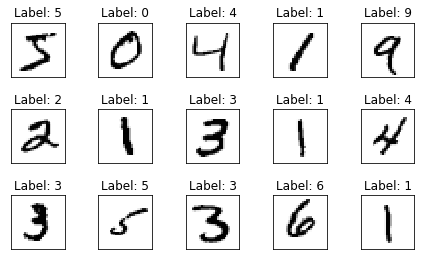

In [16]:
# mnist样例可视化
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(15):
    plt.subplot(3,5,i+1) # 绘制前15个手写体数字，以3行5列子图形式展示
    plt.tight_layout() # 自动适配子图尺寸
    plt.imshow(x_train[i], cmap='Greys') # 使用灰色显示像素灰度值
    plt.title("Label: {}".format(y_train[i])) # 设置标签为子图标题
    plt.xticks([]) # 删除x轴标记
    plt.yticks([]) # 删除y轴标记
plt.show()

In [17]:
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
X_train.shape
X_test.shape

(60000, 784)

(10000, 784)

## 数据处理 归一化

In [18]:
# 将数据类型转换为float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# 数据归一化
X_train /= 255
X_test /= 255

## 统计训练数据各标签数量

In [19]:
import numpy as np
# 统计训练数据中各标签数量，如果分布不均做处理
label, count = np.unique(y_train, return_counts=True)
label, count

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Label Distribution')

Text(0.5, 0, 'Label')

Text(0, 0.5, 'Count')

([<matplotlib.axis.XTick at 0x29e26002358>,
 <a list of 10 Text xticklabel objects>)

Text(0, 5923, '5923')

Text(1, 6742, '6742')

Text(2, 5958, '5958')

Text(3, 6131, '6131')

Text(4, 5842, '5842')

Text(5, 5421, '5421')

Text(6, 5918, '5918')

Text(7, 6265, '6265')

Text(8, 5851, '5851')

Text(9, 5949, '5949')

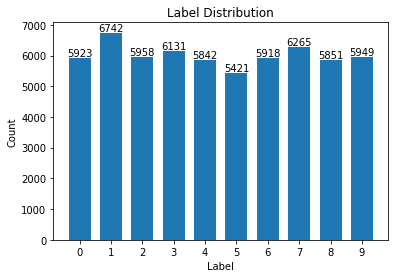

In [20]:
fig = plt.figure()
plt.bar(label, count, width = 0.7, align='center')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(label)

for a,b in zip(label, count):
    plt.text(a, b, '%d' % b, ha='center', va='bottom',fontsize=10)
    
plt.show()

## 数据处理 独热向量编码

In [38]:
# one-hot编码处理
from tensorflow.keras.utils import to_categorical
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)
Y_test = to_categorical(y_test, n_classes)

y_train[0]
Y_train[0]

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## keres定义神经网络

In [40]:
# keras构建神经网络
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


## 模型编译

In [42]:
# 模型编译
# adam优化器，交叉熵损失，精准率计算
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 模型训练

In [43]:
# 模型训练
# 块大小为128，循环4次，打印方式为每一轮打印一次，验证数据集为(X_test, Y_test)
history = model.fit(X_train,Y_train,batch_size=128,epochs=5,verbose=2,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 1s - loss: 0.2149 - acc: 0.9363 - val_loss: 0.1050 - val_acc: 0.9673
Epoch 2/5
 - 1s - loss: 0.0794 - acc: 0.9747 - val_loss: 0.0787 - val_acc: 0.9739
Epoch 3/5
 - 1s - loss: 0.0519 - acc: 0.9832 - val_loss: 0.0717 - val_acc: 0.9780
Epoch 4/5
 - 1s - loss: 0.0353 - acc: 0.9887 - val_loss: 0.0804 - val_acc: 0.9758
Epoch 5/5
 - 1s - loss: 0.0275 - acc: 0.9914 - val_loss: 0.1028 - val_acc: 0.9679


## 可视化指标

Text(0.5, 1.0, 'Model Accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

Text(0.5, 1.0, 'Model Loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

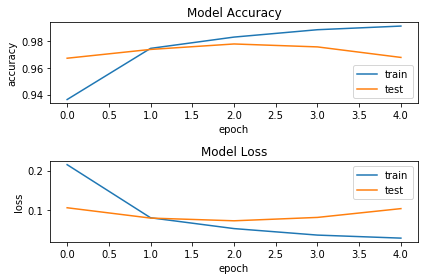

In [44]:
# 可视化指标
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

plt.show()

## 保存模型

In [45]:
# 保存模型
import os
import tensorflow.gfile as gfile

save_dir = "./mnist/model/"

# 如果已存在文件，迭代删除此目录下所有文件
if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
# 创建文件目录
gfile.MakeDirs(save_dir)

model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ./mnist/model/keras_mnist.h5 


## 加载模型

In [46]:
# 加载模型
from tensorflow.keras.models import load_model
mnist_model = load_model(model_path)

In [50]:
# 统计模型在测试集上的分类结果
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)
    
print("Test Loss: {}".format(loss_and_metrics[0]))
print("Test Accuracy: {}%".format(loss_and_metrics[1]*100))

# 预测分类
predicted_classes = mnist_model.predict_classes(X_test)

# np.nonzero 返回不为0的元素下标
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print("Classified correctly count: {}".format(len(correct_indices)))
print("Classified incorrectly count: {}".format(len(incorrect_indices)))

 - 0s - loss: 0.1028 - acc: 0.9679
Test Loss: 0.10281199087259592
Test Accuracy: 96.78999781608582%


array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64)

Classified correctly count: 9679
Classified incorrectly count: 321


## MNIST_CNN实现

In [124]:
from tensorflow.keras.datasets import mnist

# 加载数据
(x_train, y_train), (x_test, y_test) = mnist.load_data('mnist.npz')

In [125]:
# 数据处理 归一化
img_rows, img_cols = x_train.shape[1], x_train.shape[2]

if tf.keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 将数据类型转换为float32
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
# 数据归一化
X_train /= 255
X_test /= 255

In [126]:
# 独热向量编码
from tensorflow.keras.utils import to_categorical

n_classes = 10

Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

In [129]:
# 构建CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

model = Sequential()
## Feature Extraction
# 第1层卷积，32个3x3的卷积核 ，激活函数使用 relu

# 在第一层如果定义 input_shape，则可以直接使用tf.summary查看网络结构
# 否则需要 fit 或者 build 之后，才可以查看网络结构
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=input_shape))
# 第2层卷积，64个3x3的卷积核，激活函数使用 relu
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# 最大池化层，池化窗口不设置默认 2x2
model.add(MaxPool2D())
# Dropout 25% 的输入神经元
model.add(Dropout(0.25))
# 将 Pooled feature map 摊平后输入全连接网络
model.add(Flatten())
## Classification
# 全联接层
model.add(Dense(128, activation='relu'))
# Dropout 50% 的输入神经元
model.add(Dropout(0.5))
# 使用 softmax 激活函数做多分类，输出各数字的概率
model.add(Dense(n_classes, activation='softmax'))

In [130]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
__________

In [132]:
# 第一层必须确定 input_shape，否则报错
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())

[None, 26, 26, 32]
[None, 24, 24, 64]
[None, 12, 12, 64]
[None, 12, 12, 64]
[None, 9216]
[None, 128]
[None, 128]
[None, 10]


In [102]:
# 编译模型
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [103]:
# 训练模型
history = model.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=5,
                    verbose=2,
                    validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 3s - loss: 0.2412 - acc: 0.9261 - val_loss: 0.0502 - val_acc: 0.9846
Epoch 2/5
 - 3s - loss: 0.0819 - acc: 0.9753 - val_loss: 0.0379 - val_acc: 0.9877
Epoch 3/5
 - 3s - loss: 0.0629 - acc: 0.9814 - val_loss: 0.0335 - val_acc: 0.9896
Epoch 4/5
 - 3s - loss: 0.0515 - acc: 0.9834 - val_loss: 0.0362 - val_acc: 0.9888
Epoch 5/5
 - 3s - loss: 0.0425 - acc: 0.9864 - val_loss: 0.0253 - val_acc: 0.9912


# 实战 TensorFlow 验证码识别

## 准备模型开发环境

### 数据集生成

In [1]:
!pip install Pillow captcha pydot flask

#### Pillow
PIL(Python Imaging Library)为 Python 解释器添加了图像处理功能，但在 2009 年发布 1.1.7 版本后，社区便停止更新和维护。 

Pillow 是由 Alex Clark 及社区贡献者一起开发和维护的一款分叉自 PIL 的图像工具库。 

Pillow提供广泛的文件格式支持，高效的内部表示和相当强大的图像处理功能。核心图像库旨在快速访问以几种基本像素格式存储的数据，为一般的图像处理工具提供坚实的基础。

#### captcha

Catpcha 是一个生成图像和音频验证码的开源工具库。

In [53]:
# https://github.com/lepture/captcha/tree/master/captcha

# ImageCaptcha(width=160, height=60, fonts=None, font_sizes=None)
# fonts：      
# 字体文件路径，用于生成验证码时的字体，默认使用模块自带 DroidSansMono.ttf 字体，
# 可以将字体文件放入list或者tuple传入,生成验证码时将随机使用
# font_sizes： 
# 控制验证码字体大小，同fonts一样，接收一个list或者tuple,随机使用

# generate_image(chars) 生成验证码的核心方法，生成chars内容的验证码图片的Image对象

# create_captcha_image(chars, color, background) 
# generate_image的实现方法，可以通过重写此方法来实现自定义验证码样式
# color 和 background 均为三元组(255,255,255)

# create_noise_dots(image, color, width=3, number=30) 生成验证码干扰点

# create_noise_curve(image, color) 生成验证码干扰曲线

from captcha.image import ImageCaptcha
from captcha.audio import AudioCaptcha 

# image = ImageCaptcha(width=250, height=60)
# img = image.create_captcha_image('1263', color=(255,15,185),background=(35,25,250))
# ImageCaptcha.create_noise_dots(img, (255,255,255))
# ImageCaptcha.create_noise_curve(img, (111,55,25))
# img.show()
# img.save('./tmp/captcha/out.png')

image = ImageCaptcha(width=250, height=60)
image.write('1234','./tmp/captcha/out.png') 

# 默认英文发音
# audio = AudioCaptcha()
# audio.generate('1234')
# audio.write('1234', 'out.wav')

### 模型可视化
#### pydot
pydot是用纯Python实现的GraphViz接口，支持使用GraphViz解析和存储DOT语言(graph description language)，主要依赖pyparsing和GraphViz这两个工具库。

pyparsing：仅用于加载DOT文件，在 pydot 安装期间自动安装。 

GraphViz：将图形渲染为PDF，PNG，SVG等格式文件，需独立安装

### 模型服务部署
#### flask
flask是一个基于Werkzeug和jinja2开发的Python Web应用程序框架，遵从BSD开源协议，以一种简约的方式实现了框架核心，又保留了扩展性

## 生成验证码数据集

### 引入包

In [3]:
from captcha.image import ImageCaptcha

import random
import numpy as np

import tensorflow.gfile as gfile
import matplotlib.pyplot as plt
import PIL.Image as Image

### 定义常量和字符集

In [5]:
NUMBER = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
LOWERCASE = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
            'v', 'w', 'x', 'y', 'z']
UPPERCASE = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U',
           'V', 'W', 'X', 'Y', 'Z']

# 如果混合数字和字母，记得处理特殊字母如o
CAPTCHA_CHARSET = NUMBER   # 验证码字符集
CAPTCHA_LEN = 4            # 验证码长度
CAPTCHA_HEIGHT = 60        # 验证码高度
CAPTCHA_WIDTH = 160        # 验证码宽度

# 验证码数据集大小
TRAIN_DATASET_SIZE = 6000     
TEST_DATASET_SIZE = 1000 
# 验证码数据集目录
TRAIN_DATA_DIR = './captcha/train_data/' 
TEST_DATA_DIR = './captcha/test_data/'

### 生成随机字符方法定义

In [8]:
# 随机生成验证码
def gen_random_text(charset=CAPTCHA_CHARSET, length=CAPTCHA_LEN):
    text = [random.choice(charset) for _ in range(length)]
    return ''.join(text)

### 创建并保存验证码数据集的方法定义

In [9]:
def create_captcha_dataset(size=100,
                           data_dir='./captcha/',
                           height=60,                           
                           width=160,
                           image_format='.png'):

    # 如果保存验证码图像，先清空 data_dir 目录
    if gfile.Exists(data_dir):
        gfile.DeleteRecursively(data_dir)
    gfile.MakeDirs(data_dir)
    
    # 创建 ImageCaptcha 实例 captcha
    captcha = ImageCaptcha(width=width, height=height)

    for _ in range(size):
        # 生成随机的验证码字符
        text = gen_random_text(CAPTCHA_CHARSET, CAPTCHA_LEN)
        captcha.write(text, data_dir + text + image_format)

### 创建并保存训练集

In [13]:
create_captcha_dataset(TRAIN_DATASET_SIZE, TRAIN_DATA_DIR)

### 创建并保存测试集

In [14]:
create_captcha_dataset(TEST_DATASET_SIZE, TEST_DATA_DIR)

### 生成并返回验证码数据集的方法

In [23]:
def gen_captcha_dataset(size=100,
                        height=60,                           
                        width=160,
                        image_format='.png'):

    # 创建 ImageCaptcha 实例 captcha
    captcha = ImageCaptcha(width=width, height=height)

    # 创建图像和文本数组
    images, texts = [None]*size, [None]*size
    for i in range(size):
        # 生成随机的验证码字符
        texts[i] = gen_random_text(CAPTCHA_CHARSET, CAPTCHA_LEN)
        # 使用 PIL.Image.open() 识别新生成的验证码图像 
        # 然后，将图像转换为形如(CAPTCHA_WIDTH, CAPTCHA_HEIGHT, 3) 的 Numpy 数组
        images[i] = np.array(Image.open(captcha.generate(texts[i])))
        
    return images, texts

### 生成 100 张验证码图像和字符

In [24]:
images, texts = gen_captcha_dataset()

<Figure size 432x288 with 0 Axes>

Text(0.5, 1, 'Label: 6075')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 8456')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 4819')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 9943')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 5676')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 4433')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 3819')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 7627')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0127')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 1572')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0493')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 9578')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 4606')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 9375')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 4237')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 1902')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0141')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 2872')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 2910')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 5324')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

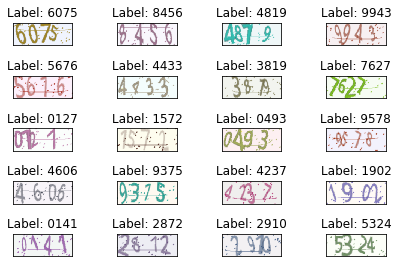

In [25]:
plt.figure()
for i in range(20):
    plt.subplot(5,4,i+1) # 绘制前20个验证码，以5行4列子图形式展示
    plt.tight_layout() # 自动适配子图尺寸
    plt.imshow(images[i])
    plt.title("Label: {}".format(texts[i])) # 设置标签为子图标题
    plt.xticks([]) # 删除x轴标记
    plt.yticks([]) # 删除y轴标记
plt.show()

## 输入和输出数据处理

### 引入包

In [4]:
from PIL import Image

import random
import glob

import numpy as np
import tensorflow.gfile as gfile
from tensorflow.keras import backend
import matplotlib.pyplot as plt

### 读取训练集前100张图片，通过文件名解析验证码

In [19]:
image = []
text = []
count = 0

for filename in glob.glob(TRAIN_DATA_DIR + '*.png'):
    image.append(np.array(Image.open(filename)))
    # 生成的文件路径 './captcha/train_data\\0000.png'
    # 应该是windows生成的问题，linux不存在 \\ 问题
    text.append(filename.lstrip(TRAIN_DATA_DIR+'\\').rstrip('.png'))
    count += 1
    if count >= 100:
        break

In [26]:
# image 是长度为100的数组，转换成numpy数组
image = np.array(image, dtype=np.float32)
image.shape

(100, 60, 160, 3)

### 数据可视化

<Figure size 432x288 with 0 Axes>

Text(0.5, 1, 'Label: 0000')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0003')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0004')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0006')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0008')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0009')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0010')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0011')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0013')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0016')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0019')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0020')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0022')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0023')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0024')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0025')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0028')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0030')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0032')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0033')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

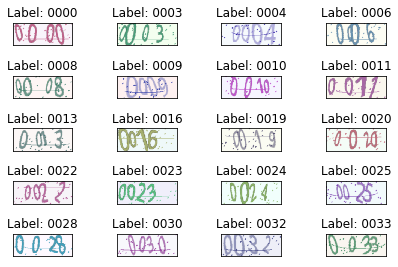

In [22]:
plt.figure()
for i in range(20):
    plt.subplot(5,4,i+1) # 绘制前20个验证码，以5行4列子图形式展示
    plt.tight_layout() # 自动适配子图尺寸
    plt.imshow(image[i])
    plt.title("Label: {}".format(text[i])) # 设置标签为子图标题
    plt.xticks([]) # 删除x轴标记
    plt.yticks([]) # 删除y轴标记
plt.show()

### 将RGB验证码图像转换成灰度图

In [34]:
def rgb2gray(img):
    # Y' = 0.299 R + 0.587 G + 0.114 B 
    # https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale
    return np.dot(img, [0.299, 0.587, 0.114])

In [35]:
image = rgb2gray(image)

In [36]:
image.shape

(100, 60, 160)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1, 'Label: 0000')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0003')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0004')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0006')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0008')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0009')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0010')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0011')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0013')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0016')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0019')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0020')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0022')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0023')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0024')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0025')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0028')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0030')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0032')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 1, 'Label: 0033')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

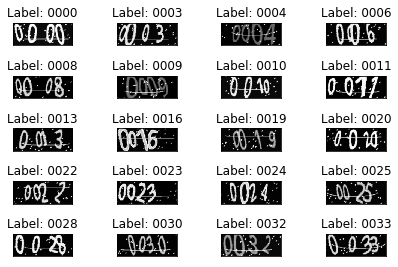

In [37]:
plt.figure()
for i in range(20):
    plt.subplot(5,4,i+1) # 绘制前20个验证码，以5行4列子图形式展示
    plt.tight_layout() # 自动适配子图尺寸
    plt.imshow(image[i], cmap='Greys')
    plt.title("Label: {}".format(text[i])) # 设置标签为子图标题
    plt.xticks([]) # 删除x轴标记
    plt.yticks([]) # 删除y轴标记
plt.show()

### 数据规范化

In [38]:
image = image / 255

### 适配keres图像数据格式

In [39]:
def fit_keras_channels(batch, rows=CAPTCHA_HEIGHT, cols=CAPTCHA_WIDTH):
    if backend.image_data_format() == 'channels_first':
        batch = batch.reshape(batch.shape[0], 1, rows, cols)
        input_shape = (1, rows, cols)
    else:
        batch = batch.reshape(batch.shape[0], rows, cols, 1)
        input_shape = (rows, cols, 1)
    
    return batch, input_shape

In [41]:
image, input_shape = fit_keras_channels(image)
image.shape
input_shape

(100, 60, 160, 1)

(60, 160, 1)

### 验证码结果one-hot编码

In [42]:
def text2vec(text, length=CAPTCHA_LEN, charset=CAPTCHA_CHARSET):
    text_len = len(text)
    # 验证码长度校验
    if text_len != length:
        raise ValueError('Error: length of captcha should be {}, but got {}'.format(length, text_len))
    
    # 生成一个形如（CAPTCHA_LEN*CAPTHA_CHARSET,) 的一维向量
    # 例如，4个纯数字的验证码生成形如(4*10,)的一维向量
    vec = np.zeros(length * len(charset))
    for i in range(length):
        # One-hot 编码验证码中的每个数字
        # 每个字符的热码 = 索引 + 偏移量
        vec[charset.index(text[i]) + i*len(charset)] = 1
    return vec

In [45]:
vec = [None]*len(text)

for i in range(len(text)):
    vec[i] = text2vec(text[i])

In [46]:
vec[0]
text[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

'0000'

### 通过结果编码解析验证码

In [47]:
def vec2text(vector):
    if not isinstance(vector, np.ndarray):
        vector = np.asarray(vector)
    vector = np.reshape(vector, [CAPTCHA_LEN, -1])
    text = ''
    for item in vector:
        text += CAPTCHA_CHARSET[np.argmax(item)]
    return text

In [48]:
# 模型对 ‘3935’ 验证码推理的输出值
yy_vec = np.array([[2.0792404e-10, 4.3756086e-07, 3.1140310e-10, 9.9823320e-01,
                    5.1135743e-15, 3.7417038e-05, 1.0556480e-08, 9.0933657e-13,
                    2.7573466e-07, 1.7286760e-03, 1.1030550e-07, 1.1852034e-07,
                    7.9457263e-10, 3.4533365e-09, 6.6065012e-14, 2.8996323e-05,
                    7.6345885e-13, 3.1817032e-16, 3.9540555e-05, 9.9993122e-01,
                    5.3814397e-13, 1.2061575e-10, 1.6408040e-03, 9.9833637e-01,
                    6.5149628e-08, 5.2246549e-12, 1.1365444e-08, 9.5700288e-12,
                    2.2725430e-05, 5.2195204e-10, 3.2457771e-13, 2.1413280e-07,
                    7.3547295e-14, 4.4094882e-06, 3.8390007e-07, 9.9230206e-01,
                    6.4467136e-03, 3.9224533e-11, 1.2461344e-03, 1.1253484e-07]],
                  dtype=np.float32)

In [49]:
yy = vec2text(yy_vec)
yy

'3935'

## 训练模型

### 引入包

In [131]:
from PIL import Image
from tensorflow.keras import backend
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

import glob
import pickle
import pydot

import numpy as np
import tensorflow.gfile as gfile
import matplotlib.pyplot as plt

### 定义超参数和字符集

In [267]:
NUMBER = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
LOWERCASE = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
            'v', 'w', 'x', 'y', 'z']
UPPERCASE = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U',
           'V', 'W', 'X', 'Y', 'Z']

CAPTCHA_CHARSET = NUMBER   # 验证码字符集
CAPTCHA_LEN = 4            # 验证码长度
CAPTCHA_HEIGHT = 60        # 验证码高度
CAPTCHA_WIDTH = 160        # 验证码宽度
# 训练集 和 测试集
TRAIN_DATA_DIR = './captcha/train_data/' 
TEST_DATA_DIR = './captcha/test_data/'

# 块大小
BATCH_SIZE = 100
# 训练轮数
EPOCHS = 100
# 优化算法，自动调节学习率
# adam/sgd/adadelta/adagrad/rmsprop/adamax/nadam
OPT = 'rmsprop'
# 损失函数
# Categorical_CE_Loss(Softmax_Loss)常用于输出one-hot向量的多类别分类模型
# Binary_CE_Loss(Sigmoid_CE_Loss)与Softmax_Loss不同，对于每个向量分量(Class)都是独立的，
#   这意味着每个向量分量计算的损失不受其他分量的影响。因此，常用于多标签分类模型。

# mean_squared_error/mean_absolute_error/mean_absolute_percentage_error/mean_squared_logarithmic_error/
# squared_hinge/hinge/categorical_hinge/logcosh/categorical_crossentropy/sparse_categorical_crossentropy/
# binary_crossentropy/kullback_leibler_divergence/poisson/cosine_proximity
LOSS = 'mean_squared_error'

MODEL_DIR = './captcha/model/train_loss_demo/'
MODEL_FORMAT = '.h5'
HISTORY_DIR = './captcha/history/train_loss_demo/'
HISTORY_FORMAT = '.history'

filename_str = "{}captcha_{}_{}_bs_{}_epochs_{}{}"

# 模型网络结构文件
MODEL_VIS_FILE = './captcha/captcha_classfication' + '.png'
# 模型文件
MODEL_FILE = filename_str.format(MODEL_DIR, OPT, LOSS, str(BATCH_SIZE), str(EPOCHS), MODEL_FORMAT)
# 训练记录文件
HISTORY_FILE = filename_str.format(HISTORY_DIR, OPT, LOSS, str(BATCH_SIZE), str(EPOCHS), HISTORY_FORMAT)

### 将 RGB 验证码图像转为灰度图

In [150]:
def rgb2gray(img):
    # Y' = 0.299 R + 0.587 G + 0.114 B 
    # https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale
    return np.dot(img[...,:3], [0.299, 0.587, 0.114])

### 对验证码中每个字符进行 one-hot 编码

In [151]:
def text2vec(text, length=CAPTCHA_LEN, charset=CAPTCHA_CHARSET):
    text_len = len(text)
    # 验证码长度校验
    if text_len != length:
        raise ValueError('Error: length of captcha should be {}, but got {}'.format(length, text_len))
    
    # 生成一个形如（CAPTCHA_LEN*CAPTHA_CHARSET,) 的一维向量
    # 例如，4个纯数字的验证码生成形如(4*10,)的一维向量
    vec = np.zeros(length * len(charset))
    for i in range(length):
        # One-hot 编码验证码中的每个数字
        # 每个字符的热码 = 索引 + 偏移量
        vec[charset.index(text[i]) + i*len(charset)] = 1
    return vec

### 将验证码向量解码为对应字符

In [152]:
def vec2text(vector):
    if not isinstance(vector, np.ndarray):
        vector = np.asarray(vector)
    vector = np.reshape(vector, [CAPTCHA_LEN, -1])
    text = ''
    for item in vector:
        text += CAPTCHA_CHARSET[np.argmax(item)]
    return text

### 适配 Keras 图像数据格式

In [153]:
def fit_keras_channels(batch, rows=CAPTCHA_HEIGHT, cols=CAPTCHA_WIDTH):
    if backend.image_data_format() == 'channels_first':
        batch = batch.reshape(batch.shape[0], 1, rows, cols)
        input_shape = (1, rows, cols)
    else:
        batch = batch.reshape(batch.shape[0], rows, cols, 1)
        input_shape = (rows, cols, 1)
    
    return batch, input_shape

### 读取训练集

In [268]:
X_train = []
Y_train = []
for filename in glob.glob(TRAIN_DATA_DIR + '*.png'):
    X_train.append(np.array(Image.open(filename)))
    # windows特有问题
    Y_train.append(filename.lstrip(TRAIN_DATA_DIR+'\\').rstrip('.png'))

### 处理训练集图像

In [269]:
# list -> rgb(numpy)
X_train = np.array(X_train, dtype=np.float32)
# rgb -> gray
X_train = rgb2gray(X_train)
# normalize
X_train = X_train / 255
# Fit keras channels
X_train, input_shape = fit_keras_channels(X_train)

X_train.shape, type(X_train), input_shape

((4491, 60, 160, 1), numpy.ndarray, (60, 160, 1))

### 处理训练集标签

In [270]:
for i in range(len(Y_train)):
    Y_train[i] = text2vec(Y_train[i])

Y_train = np.asarray(Y_train)

Y_train.shape, type(Y_train)

((4491, 40), numpy.ndarray)

### 读取测试集，处理对应图像和标签

In [271]:
X_test = []
Y_test = []

for filename in glob.glob(TEST_DATA_DIR + '*.png'):
    X_test.append(np.array(Image.open(filename)))
    Y_test.append(filename.lstrip(TEST_DATA_DIR+'\\').rstrip('.png'))

# list -> rgb -> gray -> normalization -> fit keras 
X_test = np.array(X_test, dtype=np.float32)
X_test = rgb2gray(X_test)
X_test = X_test / 255
X_test, _ = fit_keras_channels(X_test)

Y_test = list(Y_test)
for i in range(len(Y_test)):
    Y_test[i] = text2vec(Y_test[i])

Y_test = np.asarray(Y_test)

X_test.shape, type(X_test)
Y_test.shape, type(Y_test)

((945, 60, 160, 1), numpy.ndarray)

((945, 40), numpy.ndarray)

### 创建验证码识别模型

In [272]:
# 输入层
inputs = Input(shape = input_shape, name = "inputs")

# 第1层卷积
conv1 = Conv2D(32, (3, 3), name = "conv1")(inputs)
relu1 = Activation('relu', name="relu1")(conv1)

# 第2层卷积
conv2 = Conv2D(32, (3, 3), name = "conv2")(relu1)
relu2 = Activation('relu', name="relu2")(conv2)
pool2 = MaxPooling2D(pool_size=(2,2), padding='same', name="pool2")(relu2)

# 第3层卷积
conv3 = Conv2D(64, (3, 3), name = "conv3")(pool2)
relu3 = Activation('relu', name="relu3")(conv3)
pool3 = MaxPooling2D(pool_size=(2,2), padding='same', name="pool3")(relu3)

# 将 Pooled feature map 摊平后输入全连接网络
x = Flatten()(pool3)

# Dropout
x = Dropout(0.25)(x)

# 4个全连接层分别做10分类，分别对应4个字符。
x = [Dense(10, activation='softmax', name='fc%d'%(i+1))(x) for i in range(4)]

# 4个字符向量拼接在一起，与标签向量形式一致，作为模型输出。
outs = Concatenate()(x)

# 定义模型的输入与输出
model = Model(inputs=inputs, outputs=outs)
model.compile(optimizer=OPT, loss=LOSS, metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


### 查看模型摘要

In [142]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             (None, 60, 160, 1)   0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 58, 158, 32)  320         inputs[0][0]                     
__________________________________________________________________________________________________
relu1 (Activation)              (None, 58, 158, 32)  0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 56, 156, 32)  9248        relu1[0][0]                      
__________________________________________________________________________________________________
relu2 (Act

### 模型可视化

In [129]:
plot_model(model, to_file=MODEL_VIS_FILE, show_shapes=True)

### 训练模型

In [273]:
history = model.fit(X_train,
                    Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=(X_test, Y_test))

Train on 4491 samples, validate on 945 samples
Epoch 1/100
4491/4491 [==============================] - 2s 464us/sample - loss: 0.0903 - acc: 0.0452 - val_loss: 0.0899 - val_acc: 0.1101
Epoch 2/100
4491/4491 [==============================] - 2s 360us/sample - loss: 0.0888 - acc: 0.1084 - val_loss: 0.0951 - val_acc: 0.1481
Epoch 3/100
4491/4491 [==============================] - 2s 361us/sample - loss: 0.0810 - acc: 0.2144 - val_loss: 0.0755 - val_acc: 0.2254
Epoch 4/100
4491/4491 [==============================] - 2s 361us/sample - loss: 0.0644 - acc: 0.3100 - val_loss: 0.0660 - val_acc: 0.2952
Epoch 5/100
4491/4491 [==============================] - 2s 361us/sample - loss: 0.0497 - acc: 0.3683 - val_loss: 0.0615 - val_acc: 0.3492
Epoch 6/100
4491/4491 [==============================] - 2s 362us/sample - loss: 0.0389 - acc: 0.4075 - val_loss: 0.0533 - val_acc: 0.3556
Epoch 7/100
4491/4491 [==============================] - 2s 361us/sample - loss: 0.0304 - acc: 0.4286 - val_loss: 0.056

### 预测样例

In [209]:
rs = []

for i in range(10):
    yy = model.predict(X_test[i].reshape(1, 60, 160, 1))
    rs.append((vec2text(Y_test[i]),vec2text(yy)))

rs

[('0011', '0614'),
 ('0012', '0072'),
 ('0024', '0082'),
 ('0035', '0062'),
 ('0043', '0083'),
 ('0050', '0012'),
 ('0054', '0114'),
 ('0062', '0002'),
 ('0067', '0528'),
 ('0106', '0006')]

### 保存模型

In [274]:
if not gfile.Exists(MODEL_DIR):
    gfile.MakeDirs(MODEL_DIR)

model.save(MODEL_FILE)
print('Saved trained model at %s ' % MODEL_FILE)

Saved trained model at ./captcha/model/train_loss_demo/captcha_rmsprop_mean_squared_error_bs_100_epochs_100.h5 


### 保存训练过程记录

In [ ]:
history.history['acc']

In [147]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [275]:
if gfile.Exists(HISTORY_DIR) == False:
    gfile.MakeDirs(HISTORY_DIR)

with open(HISTORY_FILE, 'wb') as f:
    pickle.dump(history.history, f)

## 模型训练过程分析

### 引入第三方包

In [70]:
import glob
import pickle

import numpy as np
import matplotlib.pyplot as plt

### 加载训练过程记录

In [213]:
history_file = './captcha/history/train_opt_demo/captcha_adam_binary_crossentropy_bs_100_epochs_100.history'
with open(history_file, 'rb') as f:
    history = pickle.load(f)

### 训练过程可视化

Text(0.5, 1.0, 'Model Accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

Text(0.5, 1.0, 'Model Loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

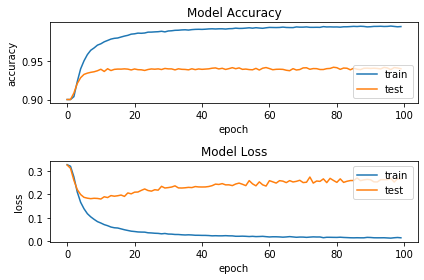

In [214]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

plt.show()

### 定义过程可视化方法

In [290]:
def plot_training(history=None, hist_dir=HISTORY_DIR, metric='acc', title='Model Accuracy', loc='lower right'):
    model_list = []
    fig = plt.figure(figsize=(10, 8))
    hist = hist_dir
    for key, val in history.items():
        if(key.startswith(hist_dir)):
            model_list.append(key.replace(hist_dir+'\\', '').rstrip('.history')) 
            plt.plot(val[metric])

    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(model_list, loc=loc)
    plt.show()

### 加载预训练模型记录

In [291]:
HISTORY_OPT_DIR = './captcha/history/train_opt_demo'
HISTORY_LOSS_DIR = './captcha/history/train_loss_demo'
history = {}
for filename in glob.glob(HISTORY_OPT_DIR + '/*.history'):
    with open(filename, 'rb') as f:
        history[filename] = pickle.load(f)
        
for filename in glob.glob(HISTORY_LOSS_DIR + '/*.history'):
    with open(filename, 'rb') as f:
        history[filename] = pickle.load(f)

### 准确率变化（训练集）

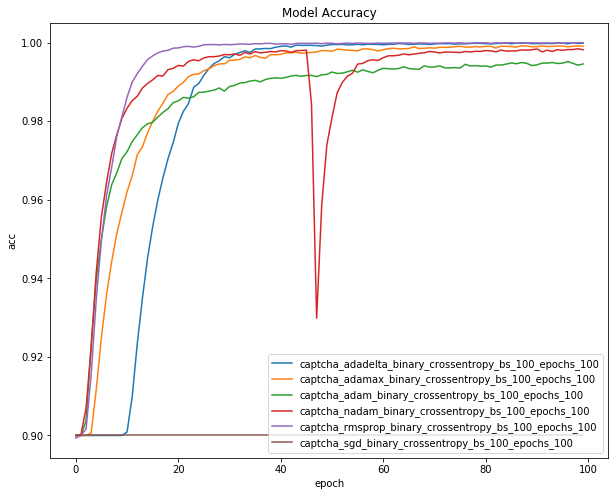

In [292]:
plot_training(history, HISTORY_OPT_DIR)

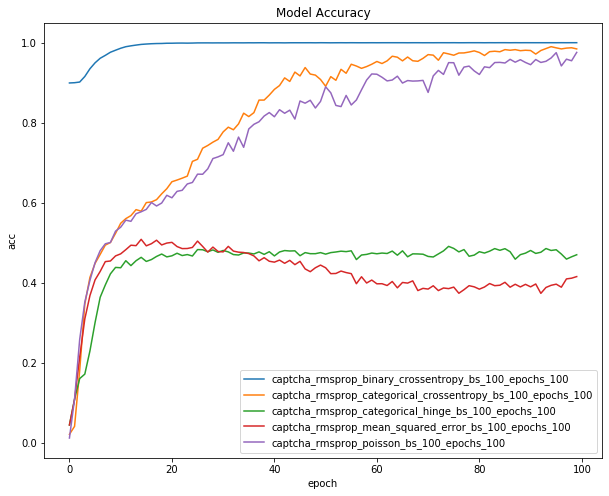

In [293]:
plot_training(history, HISTORY_LOSS_DIR)

### 损失值变化（训练集）

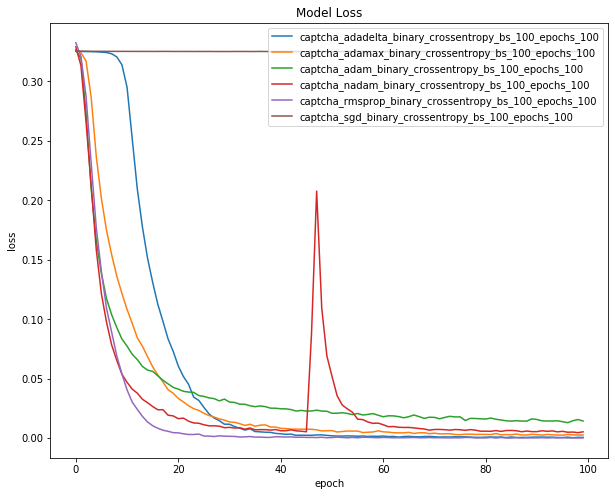

In [294]:
plot_training(history, HISTORY_OPT_DIR, metric='loss', title='Model Loss', loc='upper right')

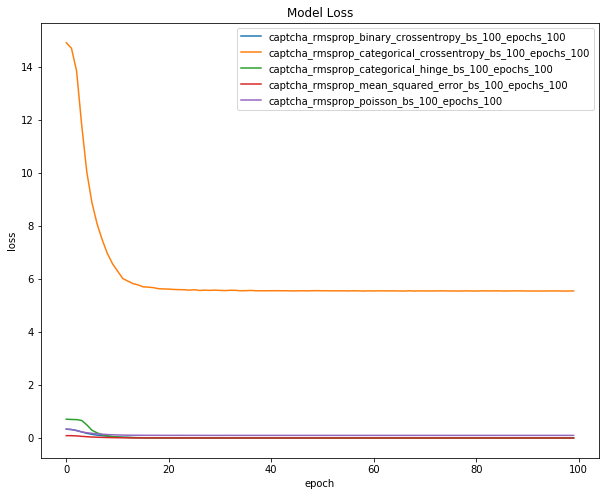

In [295]:
plot_training(history, HISTORY_LOSS_DIR, metric='loss', title='Model Loss', loc='upper right')

### 准确率变化（测试集）

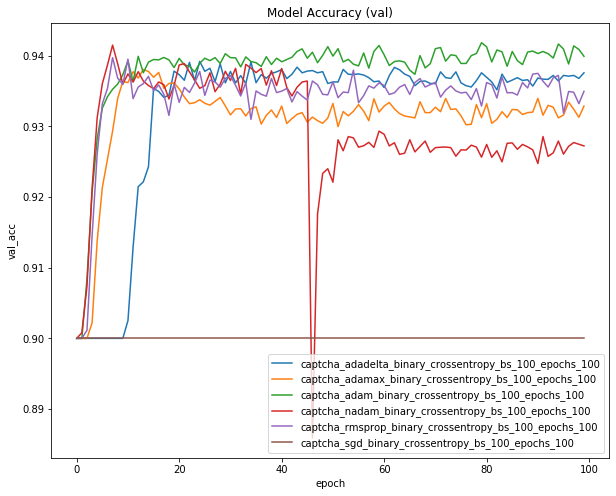

In [296]:
plot_training(history, HISTORY_OPT_DIR, metric='val_acc', title='Model Accuracy (val)')

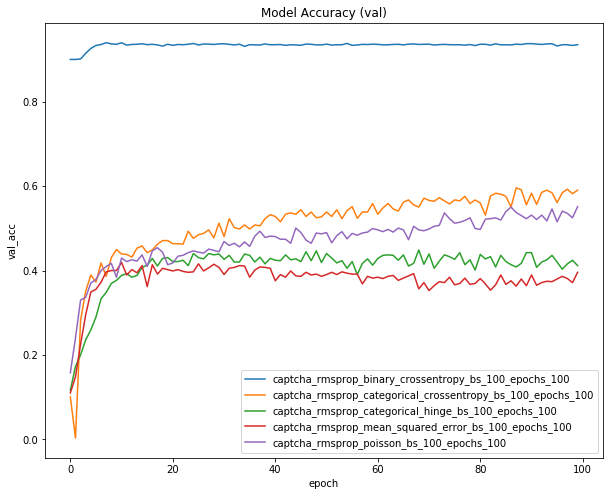

In [297]:
plot_training(history, HISTORY_LOSS_DIR, metric='val_acc', title='Model Accuracy (val)')

### 损失值变化（测试集）

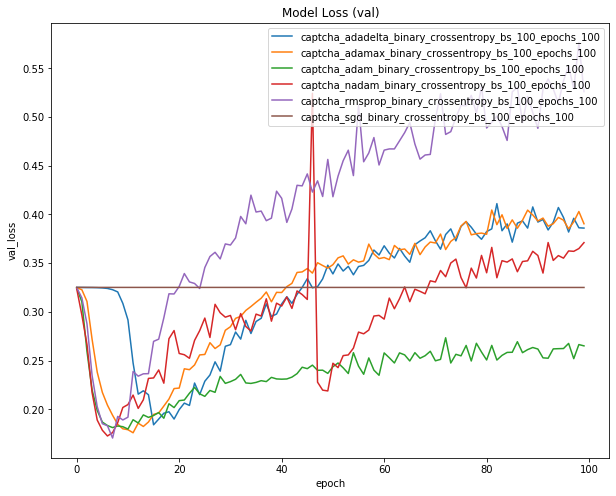

In [298]:
plot_training(history, HISTORY_OPT_DIR, metric='val_loss', title='Model Loss (val)', loc='upper right')

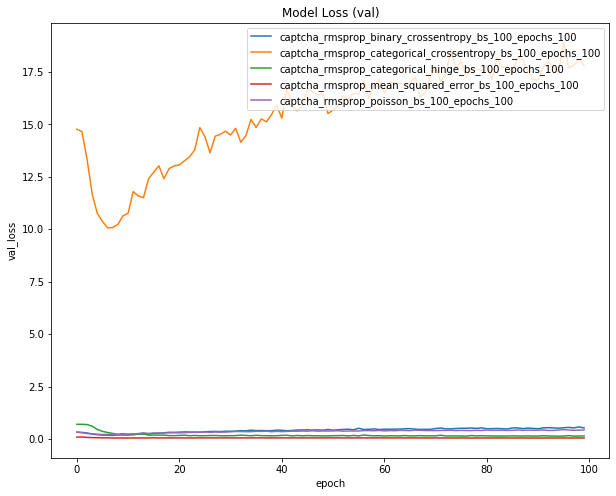

In [299]:
plot_training(history, HISTORY_LOSS_DIR, metric='val_loss', title='Model Loss (val)', loc='upper right')

### 学习率调整
![](http://a1.qpic.cn/psc?/V13yhdiD201uKI/jKwCg1C7YRUNu7w0Ty5ry3.v4EXPj*pGbPmBIDuzHiRWIOPR1KfgN7mectO3b1Tg*Ur2j0rueAgNxFUSDazCeQ!!/b&ek=1&kp=1&pt=0&bo=vAYhAwAAAAADN4o!&tl=1&vuin=605137668&tm=1587391200&sce=60-1-1&rf=viewer_4)

## 模型部署

另存为 app.py，启动 flask 来加载 app.py 文件

本地启动 
export FLASK_ENV=development && flask run --host=0.0.0.0

In [302]:
import base64

import numpy as np
import tensorflow as tf

from io import BytesIO
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from PIL import Image

NUMBER = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
LOWERCASE = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
            'v', 'w', 'x', 'y', 'z']
UPPERCASE = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U',
           'V', 'W', 'X', 'Y', 'Z']

CAPTCHA_CHARSET = NUMBER   # 验证码字符集
CAPTCHA_LEN = 4            # 验证码长度
CAPTCHA_HEIGHT = 60        # 验证码高度
CAPTCHA_WIDTH = 160        # 验证码宽度

# 10 个 Epochs 训练的模型
MODEL_FILE = './captcha/model/train_opt_demo/captcha_adam_binary_crossentropy_bs_100_epochs_100.h5'

def vec2text(vector):
    if not isinstance(vector, np.ndarray):
        vector = np.asarray(vector)
    vector = np.reshape(vector, [CAPTCHA_LEN, -1])
    text = ''
    for item in vector:
        text += CAPTCHA_CHARSET[np.argmax(item)]
    return text

def rgb2gray(img):
    # Y' = 0.299 R + 0.587 G + 0.114 B 
    # https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale
    return np.dot(img[...,:3], [0.299, 0.587, 0.114])

app = Flask(__name__) # 创建 Flask 实例

# 测试 URL
@app.route('/ping', methods=['GET', 'POST'])
def hello_world():
    return 'pong'

# 验证码识别 URL
@app.route('/predict', methods=['POST'])
def predict():
    response = {'success': False, 'prediction': '', 'debug': 'error'}
    received_image= False
    if request.method == 'POST':
        if request.files.get('image'): # 图像文件
            image = request.files['image'].read()
            received_image = True
            response['debug'] = 'get image'
            
        if received_image:
            image = np.array(Image.open(BytesIO(image)))
            image = rgb2gray(image).reshape(1, 60, 160, 1).astype('float32') / 255
            with sess.graph.as_default():
                tf.keras.backend.set_session(sess)
                pred = model.predict(image)
            response['prediction'] = vec2text(pred)
            response['success'] = True
            response['debug'] = 'predicted'
    else:
        response['debug'] = 'No Post'
    return jsonify(response)

# Failed to get convolution algorithm. This is probably because cuDNN failed to initialize
# GPU内存不足造成的
# 以下代码中 config 实现对GPU进行按需分配
global sess, model
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# tf使用动态图，不固定session，会导致数据流图错乱，model无法正确读取
sess = tf.Session(graph=tf.Graph(),config=config)
# 设置默认数据流图
with sess.graph.as_default():
    # 设置会话
    tf.keras.backend.set_session(sess)
    # 加载模型
    model = load_model(MODEL_FILE)
    